#### financial records analytics
*This note contains python code written to do analysis on my own financial records from March 2019 'till March 2020.*

# Setup
First, let's make sure this notebook works well by importing a few common modules, ensure MatplotLib plots figures:

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text
import numpy as np

In [54]:
pwd

'/home/ehab/Desktop/clean-dfs-analytics'

# Combining and tuning dataset
Build dataset after running cleaning script on both df's.

In [58]:
df_credit = pd.read_csv('/home/ehab/Desktop/clean-dfs-analytics/analytics-22158-credit.csv')
df_debit = pd.read_csv('/home/ehab/Desktop/clean-dfs-analytics/analytics-22158-debit.csv')
frames = [df_credit, df_debit]
df = pd.concat(frames,ignore_index=True)
#df = df.drop(columns=["Unnamed: 4","Unnamed: 5","Unnamed: 6"])
# sorting transactions by date
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date',ignore_index=True)
df.head()

,Date,Transaction,Amount,Category
0,2019-03-27,WITHDRAWAL,800.0,NaN
1,2019-04-14,WITHDRAWAL,200.0,NaN
2,2019-04-15,WITHDRAWAL,300.0,NaN
3,2019-04-18,WITHDRAWAL,3.0,NaN
4,2019-04-18,WITHDRAWAL,100.0,NaN


In [59]:
df['Transaction'].unique()

array(['WITHDRAWAL', 'PAPA JOHNS', 'Uber', 'Spotify',
       'TOTAL FUEL Gas Station', 'EL EZABY', 'H&M-CAIRO FESTIVAL',
       'AMERICAN EAGLE OUTFIT', 'CARREFOUR', 'myfawry', 'MASTER EXPRESS',
       'PIZZAHUT', 'IKEA', 'HOLMES BURGERS', 'Go Bus', 'AMZN', 'MINISO',
       'Dahab Hostel', 'BRAZILIAN COFFEE', 'BERSHKA', 'DECATHLON',
       'VAUDE', 'LC WAIKIKI', 'BOXER', 'TOWN TEAM', 'STARBUCKS',
       'EMARATMISR', 'UDEMY', 'MCDONALDS', 'Swvl', 'SOUQ', 'Other',
       'ALFA LAB', 'ZARA', 'DRINIKIES DUNES', 'CILANTRO', 'EL AMIN',
       'ADIDAS', 'ON THE RUN', 'MAHRAGA', 'HEART ATTACK', 'SPINNEYS',
       'CAREEM', 'DUKES', 'Flight Tickets', 'German Course',
       'TOTAL BONJOUR Gas Station', 'KFC', 'RADIOSHACK', 'EGYPTRAILWAYS'],
      dtype=object)

## Categorization method
Categorization function to categorize transactions and put labels on them for deeper element access:

In [60]:
def categorizations(word):
    category_dict = {
        "WITHDRAWAL" : "Withdrawal",
        "PAPA JOHNS" : "Eating Out",
        "PIZZAHUT" : "Eating Out",
        "HOLMES BURGERS" : "Eating Out",
        "DUKES" : "Eating Out",
        "KFC" : "Eating Out",
        "MCDONALDS" : "Eating Out",
        "MAHRAGA" : "Eating Out",
        "EL AMIN" : "Eating Out",
        "DRINIKIES DUNES" : "Eating Out",
        "CILANTRO" : "Eating Out",
        "HEART ATTACK" : "Eating Out",
        "BRAZILIAN COFFEE" : "Eating Out",
        "CARREFOUR" : "Groceries",
        "SPINNEYS" : "Groceries",
        "Uber" : "Transportations",
        "Go Bus" : "Transportations",
        "CAREEM" : "Transportations",
        "Swvl" : "Transportations",
        "EGYPTRAILWAYS" : "Transportations",
        "TOTAL FUEL Gas Station" : "Snacks & Coffee",
        "MASTER EXPRESS" : "Snacks & Coffee",
        "EMARATMISR" : "Snacks & Coffee",
        "ON THE RUN" : "Snacks & Coffee",
        "TOTAL BONJOUR Gas Station" : "Snacks & Coffee",
        "STARBUCKS" : "Snacks & Coffee",
        "AMZN" : "Personal Development",
        "UDEMY" : "Personal Development",
        "German Course" : "Personal Development",
        "Spotify" : "Music",
        "myfawry" : "Music",
        "RADIOSHACK" : "Music",
        "H&M-CAIRO FESTIVAL" : "Clothing",
        "AMERICAN EAGLE OUTFIT" : "Clothing",
        "BERSHKA" : "Clothing",
        "DECATHLON" : "Clothing",
        "BOXER" : "Clothing",
        "VAUDE" : "Clothing",
        "LC WAIKIKI" : "Clothing",
        "TOWN TEAM" : "Clothing",
        "ZARA" : "Clothing",
        "ADIDAS" : "Clothing",
        "IKEA":"Furniture",
        "MINISO":"Furniture",
        "SOUQ":"Furniture",
        "Other":"Other",
        "ALFA LAB":"Medical",
        "EL EZABY":"Medical",
        "Dahab Hostel":"Entertainment",
        "Flight Tickets":"Entertainment"
    }
    return category_dict.get(word)

In [61]:
#filling up category column
for i in range(len(df['Transaction'])):
    df['Category'].loc[i] = categorizations(df['Transaction'].loc[i])

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [62]:
#setting category column as index
df.set_index("Category", inplace = True)

In [63]:
df

,Date,Transaction,Amount
Category,,,
Withdrawal,2019-03-27,WITHDRAWAL,800.00
Withdrawal,2019-04-14,WITHDRAWAL,200.00
Withdrawal,2019-04-15,WITHDRAWAL,300.00
Withdrawal,2019-04-18,WITHDRAWAL,3.00
Withdrawal,2019-04-18,WITHDRAWAL,100.00
...,...,...,...
Eating Out,2020-03-25,MCDONALDS,51.00
Groceries,2020-03-25,CARREFOUR,665.80
Transportations,2020-03-26,Uber,78.62


In [64]:
df.index

Index(['Withdrawal', 'Withdrawal', 'Withdrawal', 'Withdrawal', 'Withdrawal',
       'Withdrawal', 'Withdrawal', 'Withdrawal', 'Withdrawal', 'Withdrawal',
       ...
       'Transportations', 'Withdrawal', 'Withdrawal', 'Snacks & Coffee',
       'Music', 'Eating Out', 'Groceries', 'Transportations', 'Withdrawal',
       'Withdrawal'],
      dtype='object', name='Category', length=547)

In [65]:
df.columns

Index(['Date', 'Transaction', 'Amount'], dtype='object')

# Where did my money go?
First, lets build different dataframe with the summation of each category.

In [66]:
total_amounts = df.groupby('Category')['Amount'].sum().reset_index()
total_amounts

,Category,Amount
0,Clothing,10885.00
1,Eating Out,3968.09
2,Entertainment,7800.00
3,Furniture,4052.40
4,Groceries,5852.97
5,Medical,1621.17
6,Music,3090.84
7,Other,2659.47
8,Personal Development,10028.90
9,Snacks & Coffee,3916.44


Total money spent:  98877.75 EGP, With total count of transactions: 547


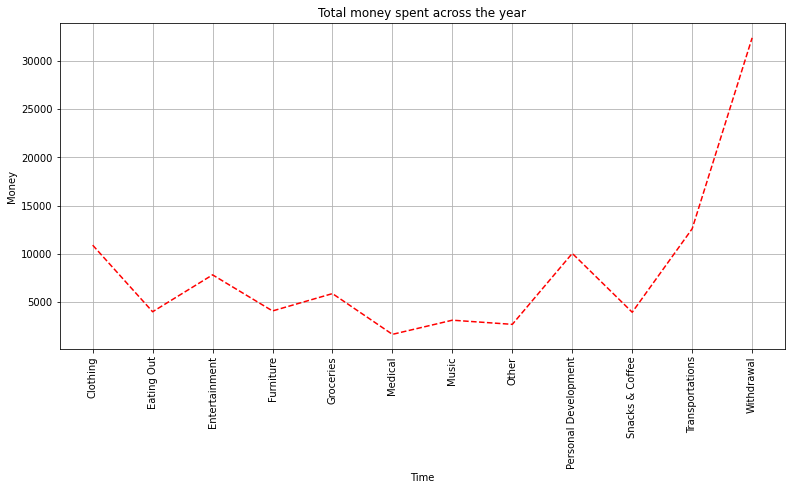

In [80]:
plt.figure(figsize=(13,6))
plt.plot('Category','Amount','--r',data=total_amounts)
plt.xticks(total_amounts.index, total_amounts['Category'], rotation=90)
plt.title("Total money spent across the year")
plt.ylabel("Money")
plt.xlabel("Time")
plt.grid(True)
total_money_sum = total_amounts['Amount'].sum()
total_tran_count = df['Amount'].count()
print("Total money spent: ",total_money_sum,"EGP, With total count of transactions:", total_tran_count)
plt.savefig('Total money spent across the year' + '.png', bbox_inches='tight')

Apparently first observation that I have a lot of withdrawals, over 30k in total, that's a lot of untracked money I can't even remember were did I spend it! But again COVID-19 and fear of banking systems to fall apart made me to withdraw extra cash than usual.

## Analysing transportations.. Uber, Swvl, etc..
Use Categorization function I can locate all indexes with the name 'Transportations'.

In [68]:
all_trans = df.loc['Transportations']
df.loc['Transportations'].head()

,Date,Transaction,Amount
Category,,,
Transportations,2019-06-09,Uber,10.06
Transportations,2019-06-09,Uber,46.45
Transportations,2019-06-09,Uber,47.35
Transportations,2019-08-01,Uber,98.52
Transportations,2019-08-04,Uber,18.05


Money Spent on transportations:  12588.47 EGP, With total count of transactions: 257


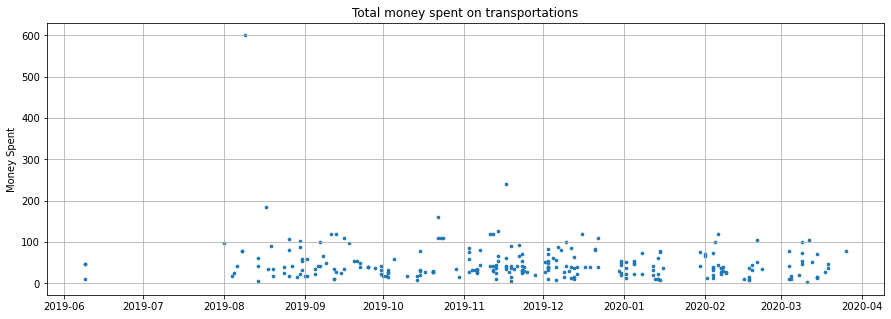

In [81]:
plt.figure(figsize=(15,5))
#scattering
plt.scatter('Date','Amount',data=all_trans,s=7)
plt.title("Total money spent on transportations")
plt.ylabel("Money Spent")
plt.grid(True)
res = all_trans['Amount'].sum()
total_tran_count = all_trans['Amount'].count()
print("Money Spent on transportations: ", "%.2f" % res,"EGP, With total count of transactions:", total_tran_count)
plt.savefig('Total money spent on transportations' + '.png', bbox_inches='tight')

Over 12k spent over commute, most of the rides are 100 and under, probably this will be uber rides.. let's find out.

## Analysing Uber rides
Build dataframe with every transaction with value 'Uber':

In [70]:
uber_df = df[df['Transaction']  == 'Uber']
uber_df.head()

,Date,Transaction,Amount
Category,,,
Transportations,2019-06-09,Uber,10.06
Transportations,2019-06-09,Uber,46.45
Transportations,2019-06-09,Uber,47.35
Transportations,2019-08-01,Uber,98.52
Transportations,2019-08-04,Uber,18.05


Uber rides :  9035.57 EGP, With total count of transactions: 223


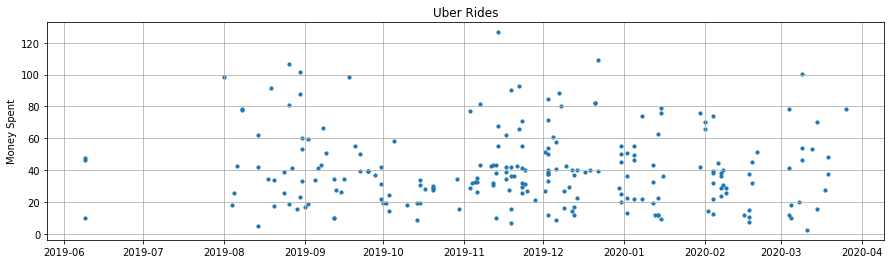

In [83]:
plt.figure(figsize=(15,4))
#scattering
plt.scatter('Date','Amount',data=uber_df,s=10)
plt.title("Uber Rides")
plt.ylabel("Money Spent")
plt.grid(True)
res = uber_df['Amount'].sum()
uber_count = uber_df['Amount'].count()
print("Uber rides : ", "%.2f" % res,"EGP, With total count of transactions:", uber_count)
plt.savefig('Uber Rides' + '.png', bbox_inches='tight')

Yes! 9k on Uber! Sucks to be me! But let me see If most of them were under 65 EGP!

Uber rides under 65 :  6035.12 EGP, With total count of transactions: 187


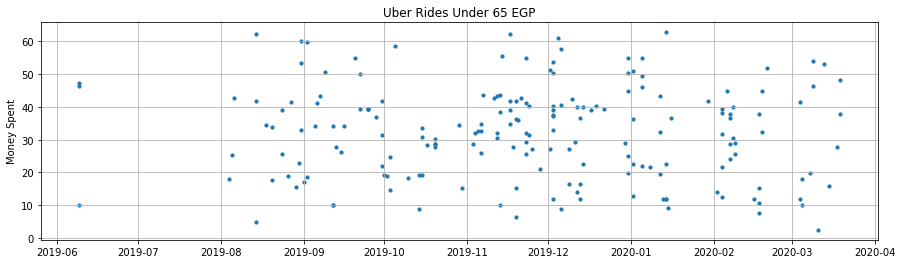

In [84]:
uber_65_df = uber_df.loc[uber_df['Amount'] <= 65]
#scattering
plt.figure(figsize=(15,4))
plt.scatter('Date','Amount',data=uber_65_df,s=10)
plt.title("Uber Rides Under 65 EGP")
plt.ylabel("Money Spent")
plt.grid(True)
res = uber_65_df['Amount'].sum()
uber_count = uber_65_df['Amount'].count()
print("Uber rides under 65 : ", "%.2f" % res,"EGP, With total count of transactions:", uber_count)
plt.savefig('Uber Rides Under 65 EGP' + '.png', bbox_inches='tight')

6k spent. This is more than 65% of the whole amount spent on Uber this year. So yeah, still sucks.

## Swvl?

In [73]:
swvl_df = df[df['Transaction']  == 'Swvl']
swvl_df.head()

,Date,Transaction,Amount
Category,,,
Transportations,2019-09-05,Swvl,22.5
Transportations,2019-09-11,Swvl,120.0
Transportations,2019-09-13,Swvl,120.0
Transportations,2019-09-16,Swvl,110.0
Transportations,2019-09-21,Swvl,55.0


Swvl rides :  2038.10 EGP, With total count of transactions: 24


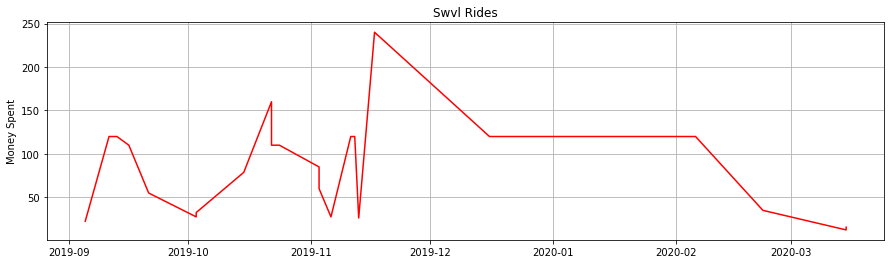

In [85]:
plt.figure(figsize=(15,4))
plt.plot('Date','Amount',data=swvl_df,color='red')
plt.title("Swvl Rides")
plt.ylabel("Money Spent")
plt.grid(True)
res = swvl_df['Amount'].sum()
res_count = swvl_df['Amount'].count()
print("Swvl rides : ", "%.2f" % res,"EGP, With total count of transactions:", res_count)
plt.savefig('Swvl Rides' + '.png', bbox_inches='tight')

Well for sure it's not much because all the money went to uber :)

## Eating in, out, snacks, coffee & lastly starbucks
Build a concatenated dataframe with all food indexes:

In [75]:
#Getting all kind of food
df_food = df[df.index.str.startswith('Eatin')]
df_snacks = df[df.index.str.startswith('Snacks')]
df_groceries = df[df.index.str.startswith('Grocer')]
frames = [df_food, df_snacks,df_groceries]
df_ftotal = pd.concat(frames,ignore_index=False)
df_ftotal.head()

,Date,Transaction,Amount
Category,,,
Eating Out,2019-06-02,PAPA JOHNS,349.98
Eating Out,2019-07-28,PIZZAHUT,98.50
Eating Out,2019-08-08,HOLMES BURGERS,171.64
Eating Out,2019-08-17,PIZZAHUT,285.99
Eating Out,2019-08-23,BRAZILIAN COFFEE,265.00


Total overall :  13737.50 EGP, With total count of transactions: 117
Total snacks and coffe:  3916.44 EGP, With total count of transactions: 73


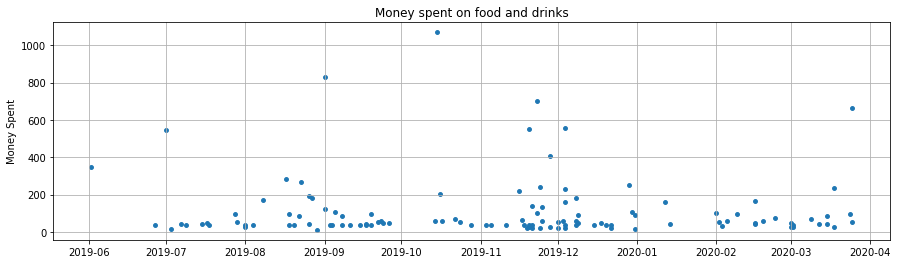

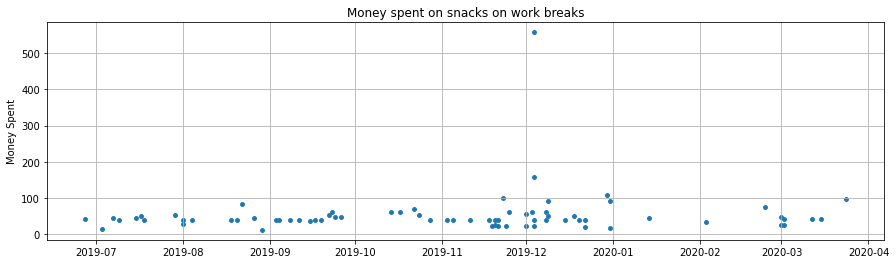

In [86]:
#scattering
plt.figure(figsize=(15,4))
plt.scatter('Date','Amount',data=df_ftotal,s=15)
plt.title("Money spent on food and drinks")
plt.ylabel("Money Spent")
plt.grid(True)
ftotal_res_var = df_ftotal['Amount'].sum()
ftotal_res_num = df_ftotal['Amount'].count()
print("Total overall : ", "%.2f" % ftotal_res_var,"EGP, With total count of transactions:", ftotal_res_num)
plt.savefig('Money spent on food and drinks' + '.png', bbox_inches='tight')

#snacks and coffe on work breaks
df_around = df.loc['Snacks & Coffee']

#scattering
plt.figure(figsize=(15,4))
plt.scatter('Date','Amount',data=df_around,s=15)
plt.title("Money spent on snacks on work breaks")
plt.ylabel("Money Spent")
plt.grid(True)
around_res_var = df_around['Amount'].sum()
around_res_num = df_around['Amount'].count()
print("Total snacks and coffe: ", "%.2f" % around_res_var,"EGP, With total count of transactions:", around_res_num)
plt.savefig('Money spent on snacks on work breaks' + '.png', bbox_inches='tight')

I spent over 13k on food, I think thats a good estimate for one person per year.. But, around 4k spent on snaks and coffee at work!.. But from feb 2020, spending habbits on work has decreased dramatically, I think thats because I started buying my own coffee beans and started making coffe at work. tastes shit though.

## Starbucks &  McDonald's!

Total overall :  2308.09 EGP, With total count of transactions: 24


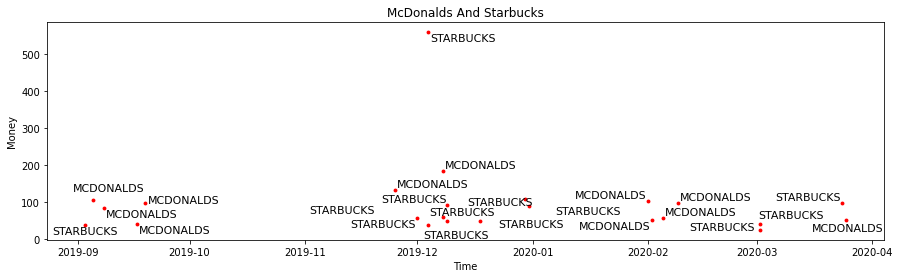

In [88]:
df_starbucks = df[df['Transaction']  == 'STARBUCKS']
df_mc = df[df['Transaction']  == 'MCDONALDS']
frames = [df_starbucks, df_mc]
df_trashf = pd.concat(frames,ignore_index=False)

def plot_trashfood(adjust=False):
    plt.figure(figsize=(15, 4))
    x, y = df_trashf['Date'], df_trashf['Amount']
    plt.scatter(x, y, s=15, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(x, y, df_trashf['Transaction']):
        texts.append(plt.text(x, y, s, size=11))
    plt.xlabel('Time')
    plt.ylabel('Money')
    ftrash_res_var = df_trashf['Amount'].sum()
    ftrash_res_num = df_trashf['Amount'].count()
    print("Total overall : ", "%.2f" % ftrash_res_var,"EGP, With total count of transactions:", ftrash_res_num)
    if adjust:
        plt.title(adjust_text(texts))
        plt.title('McDonalds And Starbucks')
        plt.savefig('McDonalds And Starbucks' + '.png', bbox_inches='tight')
plot_trashfood(adjust=True)

Don't ask about the 550 EGP starbucks dot way up!

## And now to the fun part! clothes

Total overall :  10885.00 EGP, With total count of transactions: 16


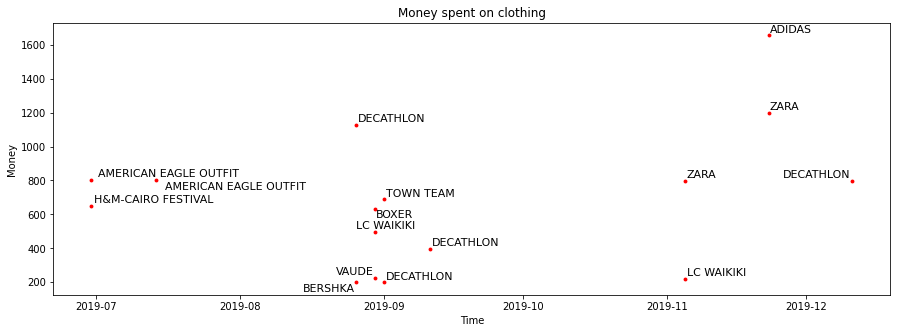

In [89]:
df_cloth = df[df.index.str.startswith('Cloth')]
def plot_cloth(adjust=False):
    plt.figure(figsize=(15, 5))
    x, y = df_cloth['Date'], df_cloth['Amount']
    plt.scatter(x, y, s=15, c='r', edgecolors=(1,1,1,0))
    texts = []
    for x, y, s in zip(x, y, df_cloth['Transaction']):
        texts.append(plt.text(x, y, s, size=11))
    plt.xlabel('Time')
    plt.ylabel('Money')
    cloth_res_var = df_cloth['Amount'].sum()
    cloth_res_num = df_cloth['Amount'].count()
    print("Total overall : ", "%.2f" % cloth_res_var,"EGP, With total count of transactions:", cloth_res_num)
    if adjust:
        plt.title(adjust_text(texts))
        plt.title('Money spent on clothing')
        plt.savefig('Money spent on clothing' + '.png', bbox_inches='tight')
plot_cloth(adjust=True)

## Finally it's time to know how money do I put to invest in myself

Total overall :  10885.00 EGP , With total transactions of:  16


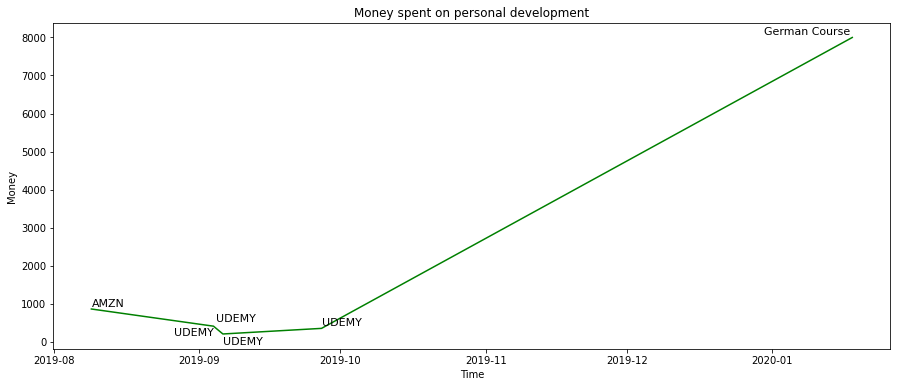

In [90]:
df_pr = df[df.index.str.startswith('Personal')]
def plot_pr(adjust=False):
    plt.figure(figsize=(15, 6))
    x, y = df_pr['Date'], df_pr['Amount']
    plt.plot(x, y, c='g')
    texts = []
    for x, y, s in zip(x, y, df_pr['Transaction']):
        texts.append(plt.text(x, y, s, size=11))
    plt.xlabel('Time')
    plt.ylabel('Money')
    pr_res_var = df_cloth['Amount'].sum()
    pr_res_num = df_cloth['Amount'].count()
    print("Total overall : ", "%.2f" % pr_res_var,"EGP",", With total transactions of: ", pr_res_num)
    if adjust:
        plt.title(adjust_text(texts))
        plt.title('Money spent on personal development')
        plt.savefig('Money spent on personal development' + '.png', bbox_inches='tight')
plot_pr(adjust=True)

Good. But apparently I like food and clothes way more!